# Gausova Kvadratura a Legendrovy polynomy

imports:

In [132]:
import karhunenLoeve as kl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np
import time


Graph settings:

In [133]:
plt.rc('font', family='Times Roman', size=12)  # Rodina a velikost písma
plt.rc('figure', figsize=(8, 5), dpi=100)  # Velikost a rozlišení obrázku
plt.rc('text', usetex=True)
plt.rc('grid', color='gray', linestyle='--')
plt.rc('axes', grid=True)


# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [134]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
real_integ_value = fI(1)-fI(-1)
Gq = kl.integ.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.6666666666666639
actual value of integral: 0.6666666666666666
error: 2.7755575615628914e-15


over interval (a,b)

In [135]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
real_integ_value = fI(b)-fI(a)
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: 8.659739592076221e-15


##### testing orthonormality of polynomials

In [136]:
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal(x, 50)[n]*kl.integ.legendre_normal(x, 50)[n]
real_integ_value = 1
Gq = kl.integ.quadrature(f, matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.999999999999995
actual value of integral: 1
error: 4.9960036108132044e-15


In [137]:
a=4
b=20
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal_int(x, 100, a, b)[n]*kl.integ.legendre_normal_int(x, 100, a, b)[n]
real_integ_value = 1
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.9999999999999948
actual value of integral: 1
error: 5.218048215738236e-15


## Konvergation graphs 

0.0


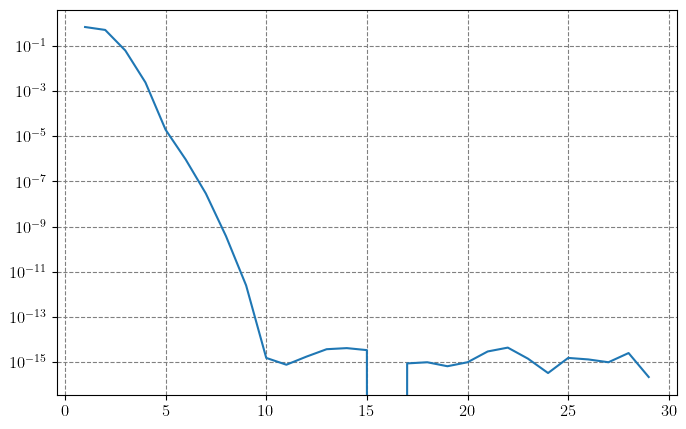

In [138]:
matrix_size = 30
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(n_counts,res)
plt.yscale('log')
print(res[15])

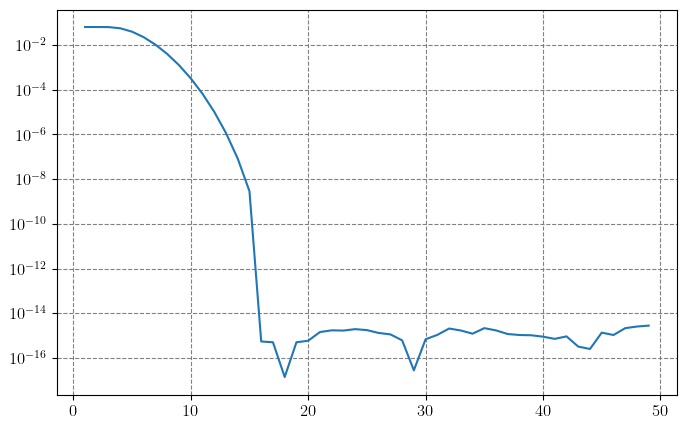

In [139]:
matrix_size=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(n_counts,res)
plt.yscale('log')

over interval <a,b>

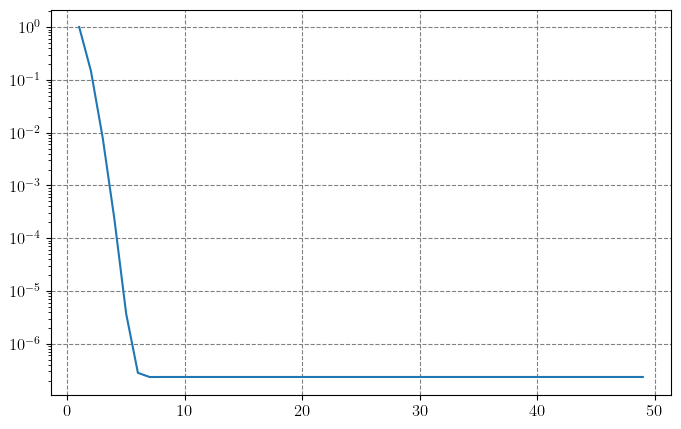

In [140]:
matrix_size=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature_int(f, i, a, b) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

test of a non-smooth function:

In [141]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1

approx = []
difference = []
times = []
node_range = range(1,500)
for i in node_range:
    starttime = time.time()
    int_approx = kl.integ.quadrature(f, i)
    endtime = time.time()

    approx.append(int_approx)
    difference.append(np.abs(int_approx-real_integ_value))
    times.append(endtime-starttime)

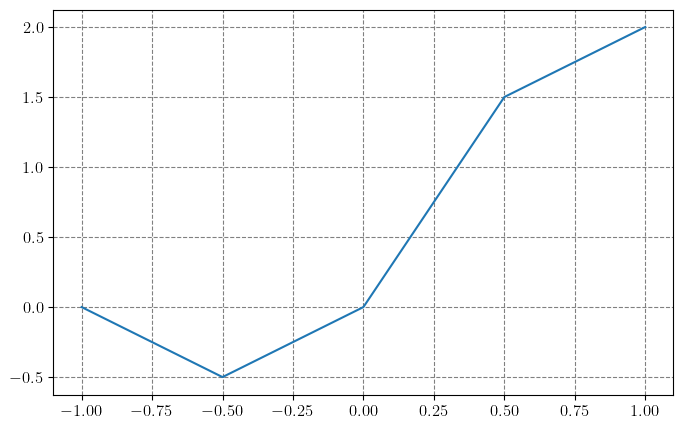

In [142]:
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))

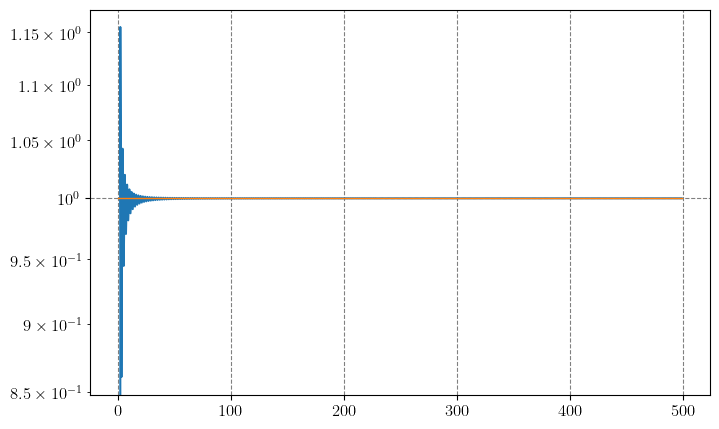

In [143]:
plt.plot(node_range,approx)
plt.plot(np.ones(500), '-', linewidth=1)
plt.yscale('log')

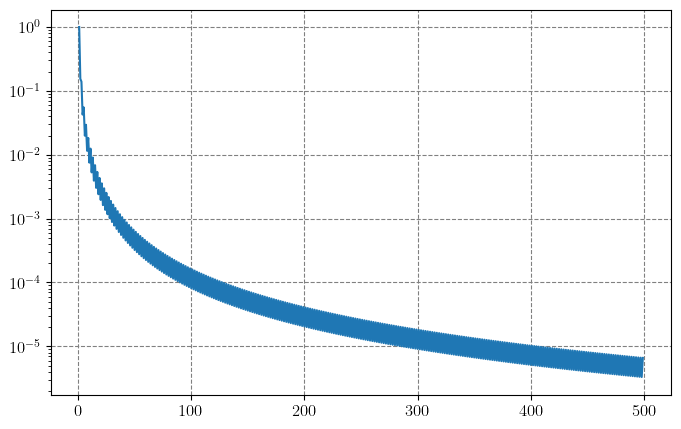

In [144]:
plt.plot(node_range,difference)
plt.yscale('log')

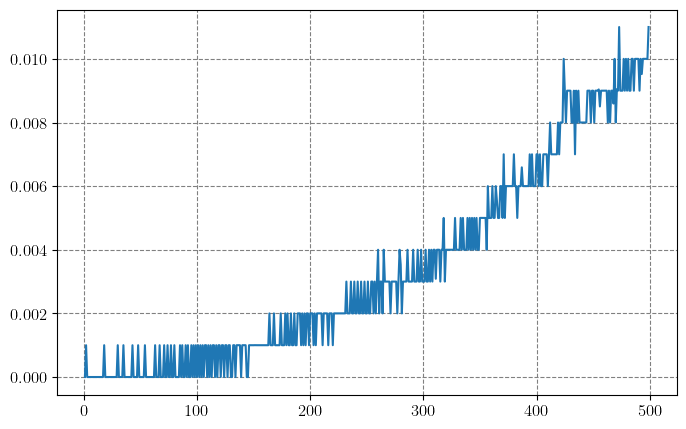

In [145]:
plt.plot(node_range,times)

test of a discontinuous function:

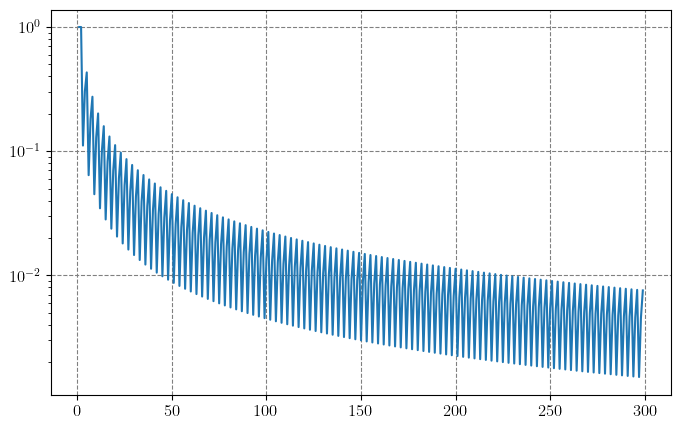

In [146]:
matrix_size=300
f = lambda x: np.sign(x+0.5)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

In [147]:
f = lambda x: np.sign(x+0.5)
fI = 1
approx = []
difference = []
times = []
node_range = range(15,1000)
for i in node_range:
    starttime = time.time()
    int_approx = kl.integ.quadrature(f, i)
    endtime = time.time()

    approx.append(int_approx)
    difference.append(np.abs(int_approx-fI))
    times.append(endtime-starttime)

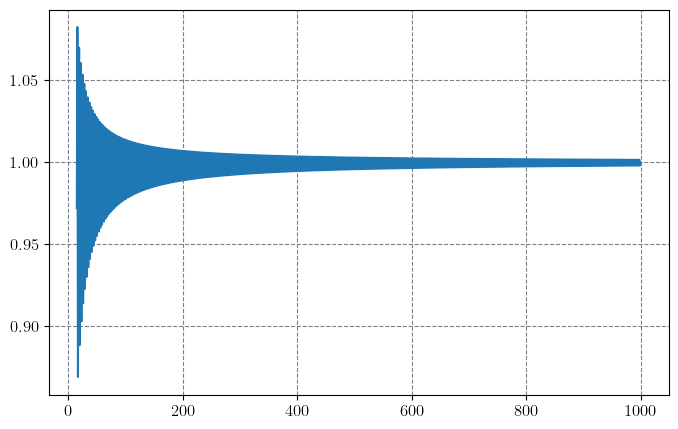

In [148]:
plt.plot(node_range,approx)
plt.show()

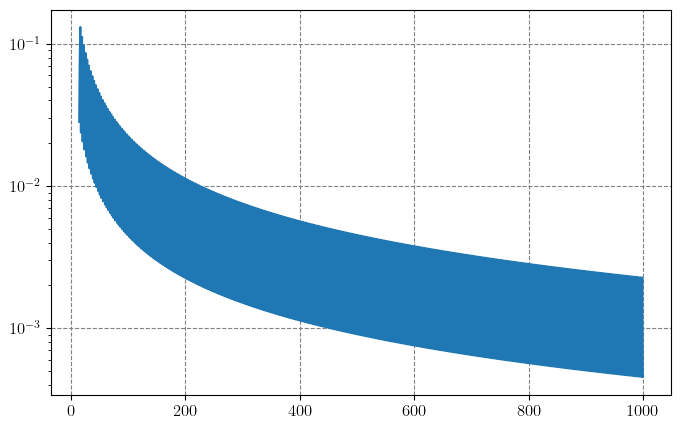

In [149]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

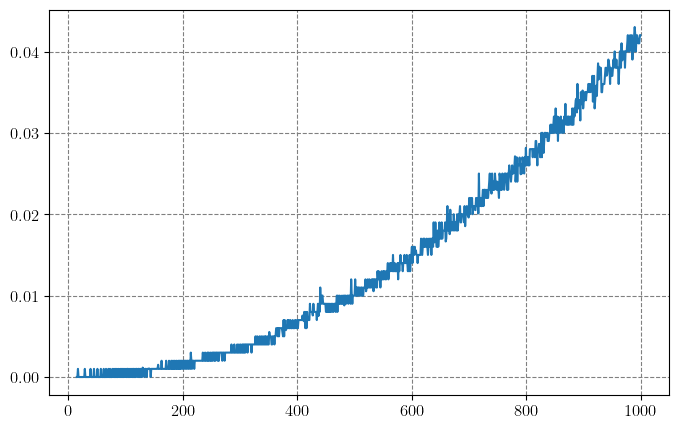

In [150]:
plt.plot(node_range,times)
plt.show()

In [151]:
f = lambda x: np.sign(x+0.5)
fI = 1
times = []
node_range = np.array([100, 200, 500, 750, 1000])
#node_range = range(1,n+20)
for i in node_range:
    starttime = time.time()
    int_approx = kl.integ.quadrature(f, i)
    endtime = time.time()
    times.append(endtime-starttime)

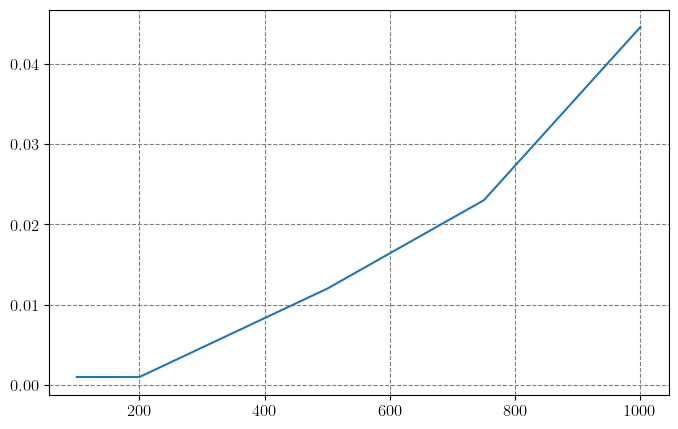

In [152]:
plt.plot(node_range,times)
plt.show()

In [153]:
n_values = node_range
log_n = np.log(n_values)
log_times = np.log(times)
coeffs = np.polyfit(log_n, log_times, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_times_fit = slope * log_n + intercept
times_fit = np.exp(log_times_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, times, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, times_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Number of nodes/weights")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


RuntimeError: latex was not able to process the following string:
b'Linear Fit (slope \\u2248 1.80)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp7halpwjh e32abd68cbfe1c5e50836ca058f2eaaa.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (MiKTeX 25.3) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(e32abd68cbfe1c5e50836ca058f2eaaa.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty)
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\mikes\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file e32abd68cbfe1c5e50836ca058f2eaaa.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ≈ (U+2248)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily Linear Fit (slope ≈
                                      1.80)}%
No pages of output.
Transcript written on C:\Users\mikes\.matplotlib\tex.cache\e3\2a\tmp7halpwjh\e3
2abd68cbfe1c5e50836ca058f2eaaa.log.




<Figure size 800x600 with 1 Axes>

#### Kovergence v log lin grafu

Polynomial:

In [ ]:
f = lambda x: x**50 + x**4 - 4*x**3 - 15*x + 35
fI = lambda x: (x**51)/51 + (x**5)/5 - x**4 - (15/2)*x**2 + 35*x
real_integ_value = fI(1)-fI(-1)
difference = []
#node_range = np.array([1, 2, 3, 4, 5, 10, 15, 20, 30])
node_range = range(5,25)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

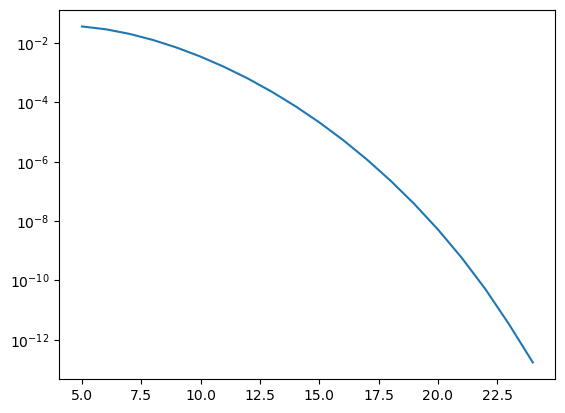

In [ ]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

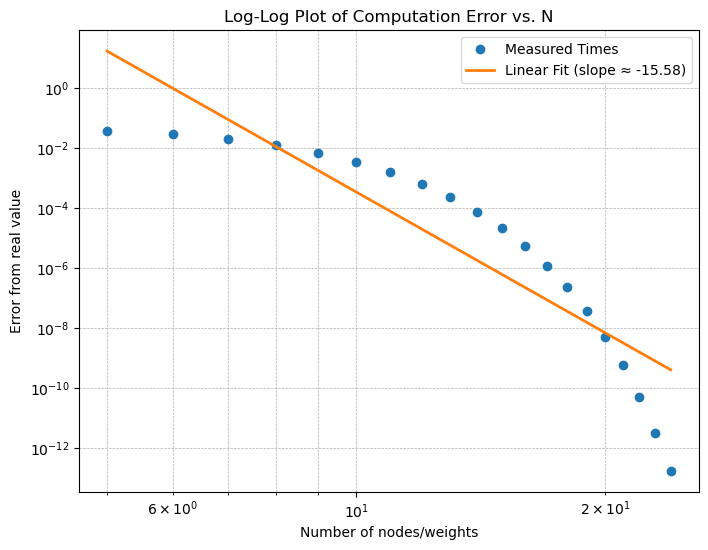

In [ ]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Number of nodes/weights")
plt.ylabel("Error from real value")
plt.title("Log-Log Plot of Computation Error vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Smooth function:

In [ ]:
f = lambda x: np.cos(x**2)
fI = lambda x: (x+52*np.sin(x)+(np.sin(x)-52*x)*np.cos(x))/2
real_integ_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
difference = []
node_range = np.array([1, 2, 3, 4, 5, 7, 10])
#node_range = range(1,20)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

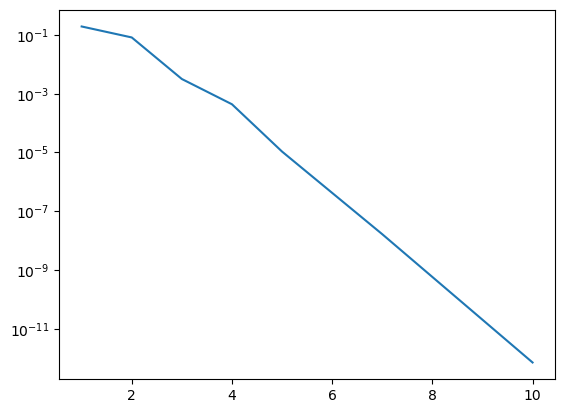

In [ ]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

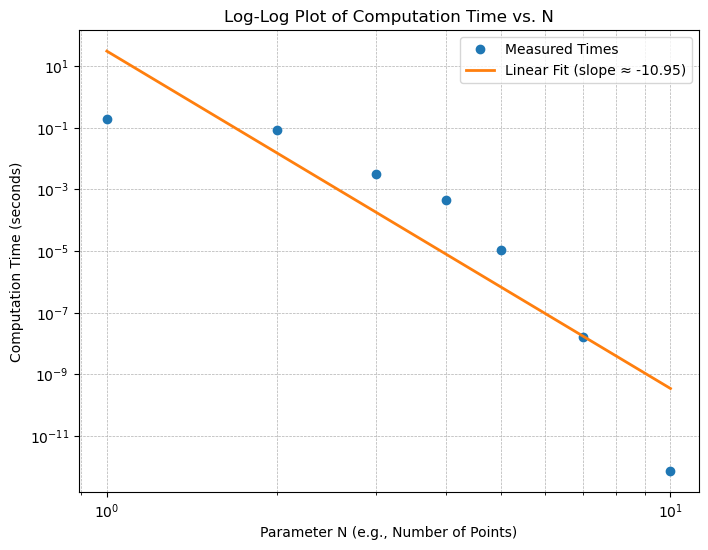

In [ ]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Non-smooth function:

In [ ]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1
difference = []
node_range = np.array([2, 4, 10, 20, 50, 100, 200])
for i in node_range:
    difference.append(abs(kl.integ.quadrature(f, i) - real_integ_value))

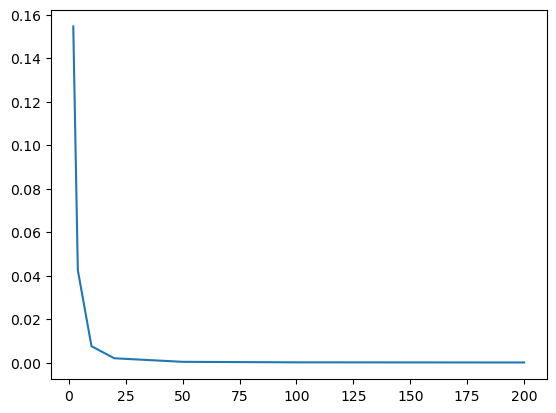

In [ ]:
plt.plot(node_range,difference)
plt.show()

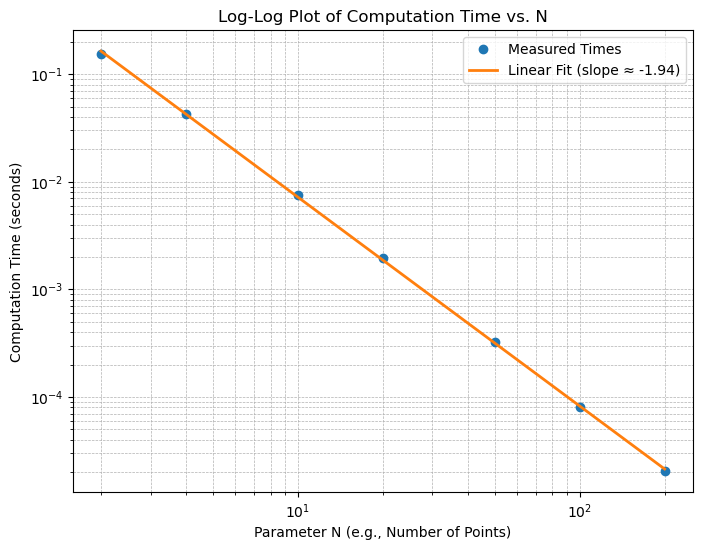

In [ ]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Discontinuous function:

In [ ]:
f = lambda x: np.sign(x+0.5)
real_integ_value = 1
difference = []
node_range = np.array([2, 4, 10, 20, 50, 100, 200])
#node_range = range(1,200)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

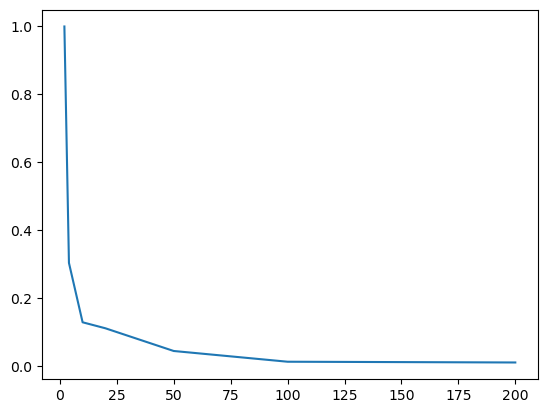

In [ ]:
plt.plot(node_range,difference)
plt.show()

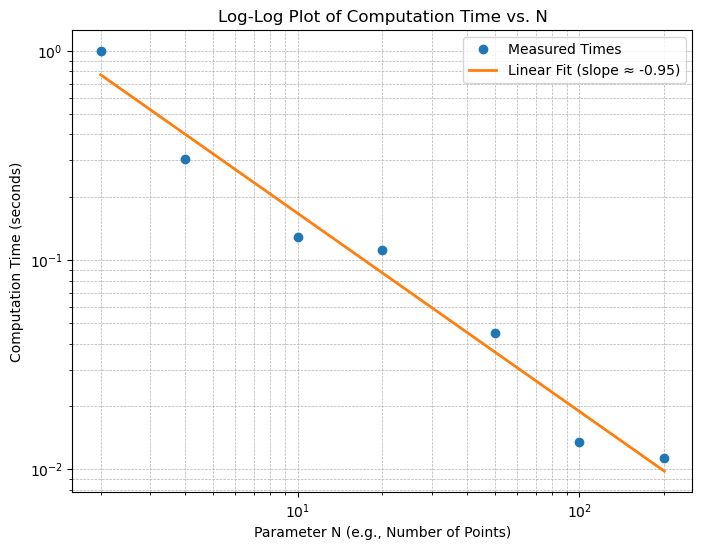

In [ ]:
n_values = node_range
log_n = np.log10(n_values)
log_dif = np.log10(difference)
coeffs = np.polyfit(log_n, log_dif, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_dif_fit = slope * log_n + intercept
dif_fit = 10**(log_dif_fit)
plt.figure(figsize=(8, 6))
plt.loglog(n_values, difference, 'o', label='Measured Times', markersize=6)
plt.loglog(n_values, dif_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

### 2D integrals

In [ ]:
nx=50
ny=100
f = lambda x,y: x**2 * np.sin(y+5)
real_integ_value = 4/3 * np.sin(1)*np.sin(5)
Gq = kl.integ.quadrature_2d(f,nx,ny)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.0758759383426544
actual value of integral: -1.075875938342652
error: 2.4424906541753444e-15


over <a,b>x<c,d>:

In [ ]:
nx=50
ny=60
a = 5
b = 10
c = 10
d = 13
f = lambda x,y: np.sin(x+y)/np.log(5*y)
real_integ_value = 0.07714107601915701
Gq = kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.07714107601915583
actual value of integral: 0.07714107601915701
error: 1.1796119636642288e-15


0.07714107601915725


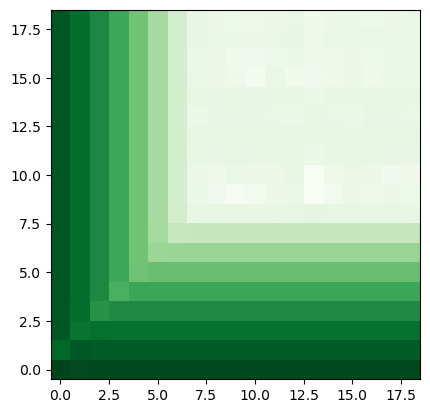

In [ ]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kl.integ.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()
